In [1]:
import sys
sys.path.append('../python_packages_static/')
import pyemu
import os
import glob
import shutil
import matplotlib.pyplot as plt

### NOTE: Make sure  `run_ensemble` is set appropriately - If `run_ensemble` is set to `True`, local runs are performed. If `run_ensemble` set to `False`results from the journal article are used. 

In [2]:
run_ensemble=False

In [3]:
if run_ensemble==True:
    input_dir = '../noptmax0_testing/' # we need to read from this directory to get the residuals from the noptmax 0 run
else:
    input_dir = '../output/noptmax0/' # we need to read from this directory to get the residuals from the noptmax 0 run
output_dir = '../run_data' # this is the folder we will actually use to set up PEST++ runs
pst_root = 'prior_mc_wide'

### read in the PEST control file

In [4]:
pst = pyemu.Pst(os.path.join(input_dir,'{}.pst'.format(pst_root)))

### make a quick pie chart showing the current distribution of the observation groups in the objective function

13290.954612364947 {'budget': 0.0, 'flux': 3.265835955177316, 'head': 12937.278850447154, 'land_surface': 350.4099259626168} {'budget': 0.0, 'flux': 0.0002457186899230712, 'head': 0.9733897396964429, 'land_surface': 0.02636454161363403}


<AxesSubplot:>

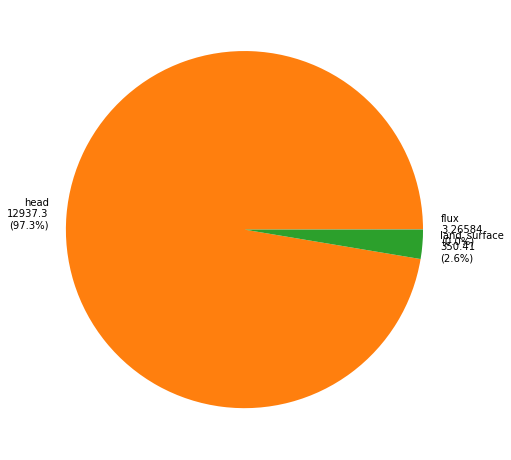

In [5]:
pst.plot(kind='phi_pie')

### we can use `pyemu` functionality to assign new weights that adjust and honor whatever balance we seek

In [6]:
new_proportions = pst.phi_components.copy()
new_proportions

{'budget': 0.0,
 'flux': 3.265835955177316,
 'head': 12937.278850447154,
 'land_surface': 350.4099259626168}

In [7]:
pst.observation_data

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
q_1436500,q_1436500,116217.231560,0.000029,flux,NaN
q_1366650,q_1366650,124046.273310,0.000081,flux,NaN
h_414525074360601,h_414525074360601,357.182016,0.200000,head,NaN
h_o10577,h_o10577,203.903379,0.200000,head,NaN
h_o10942,h_o10942,150.660417,0.200000,head,NaN
...,...,...,...,...,...
land_surf_obs_550_500,land_surf_obs_550_500,365.440000,0.100000,land_surface,NaN
land_surf_obs_600_350,land_surf_obs_600_350,443.410000,0.100000,land_surface,NaN
land_surf_obs_600_400,land_surf_obs_600_400,300.950000,0.100000,land_surface,NaN


### here we assign proportions (that sum to 1.0) to the various groups. We want to retain the same total Phi so we multiply our proportions by the total Phi

In [8]:
new_proportions['flux'] = 0.3*pst.phi
new_proportions['head'] = 0.2*pst.phi
new_proportions['land_surface'] = 0.5*pst.phi
new_proportions['budget'] = 0

In [9]:
new_proportions

{'budget': 0,
 'flux': 3987.2863837094837,
 'head': 2658.1909224729898,
 'land_surface': 6645.4773061824735}

### using the `phi_components` dictionary, making a copy of it, and reassigning values, we can update the PST object using the `adjust_weights` function

In [10]:
pst.adjust_weights(obsgrp_dict=new_proportions)

In [11]:
pst.observation_data

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
q_1436500,q_1436500,116217.231560,0.001001,flux,NaN
q_1366650,q_1366650,124046.273310,0.002817,flux,NaN
h_414525074360601,h_414525074360601,357.182016,0.090657,head,NaN
h_o10577,h_o10577,203.903379,0.090657,head,NaN
h_o10942,h_o10942,150.660417,0.090657,head,NaN
...,...,...,...,...,...
land_surf_obs_550_500,land_surf_obs_550_500,365.440000,0.435487,land_surface,NaN
land_surf_obs_600_350,land_surf_obs_600_350,443.410000,0.435487,land_surface,NaN
land_surf_obs_600_400,land_surf_obs_600_400,300.950000,0.435487,land_surface,NaN


### now we can see the updated pie chart

13290.95461236495 {'budget': 0.0, 'flux': 3987.286383709485, 'head': 2658.1909224729893, 'land_surface': 6645.477306182476} {'budget': 0.0, 'flux': 0.3, 'head': 0.19999999999999993, 'land_surface': 0.5000000000000001}


<AxesSubplot:>

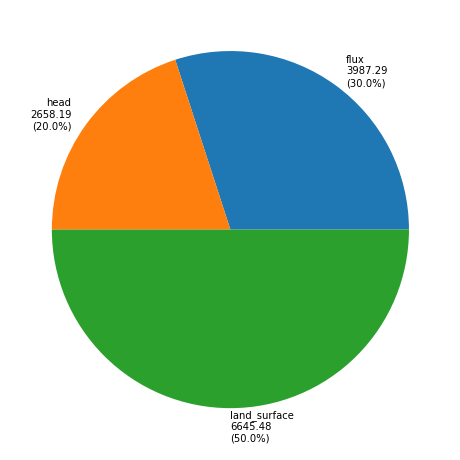

In [12]:
pst.plot(kind='phi_pie')


In [13]:
# set some values for pestpp-ies
if run_ensemble == True:
    pst.pestpp_options["ies_num_reals"] = 20  
else:
    pst.pestpp_options["ies_num_reals"] = 500 
    
pst.pestpp_options["ies_bad_phi_sigma"] = 2.5
pst.pestpp_options["overdue_giveup_fac"] = 4
pst.pestpp_options["ies_save_rescov"] = True
pst.pestpp_options["ies_no_noise"] = True
pst.pestpp_options["ies_drop_conflicts"] = False
pst.pestpp_options["ies_pdc_sigma_distance"] = 3.0
pst.pestpp_options['ies_autoadaloc']=True
pst.pestpp_options['ies_num_threads']=4
pst.pestpp_options['ies_lambda_mults']=(0.1,1.0,10.0,100.0)
pst.pestpp_options['lambda_scale_fac'] = (0.75,0.9,1.0,1.1)
pst.pestpp_options['ies_subset_size']=10

# set SVD for some regularization
pst.svd_data.maxsing = 250

In [14]:
# check number of realizations
pst.pestpp_options["ies_num_reals"]

500

### using `pestpp-ies`, settting `noptmax=-1` and running in parallel will run a single pass through the initial ensemble, Monte Carlo style

In [15]:
# set up for prior Monte Carlo
pst.control_data.noptmax = -1
pst.write(os.path.join(output_dir, '{}.pst'.format(pst_root)))

noptmax:-1, npar_adj:4911, nnz_obs:525


## If `run_ensemble=True` the cell below will run a local `prior_mc_wide` Monte Carlo
* same process as in 1.0_PEST_reweight_objective_function_for_prior_MC
* using the number of realizations specified by `pst.pestpp_options["ies_num_reals"]`
* will run in parallel locally using the number of cores specified below by `num_workers`
* creates a new directory called `"../master_mc/"` which is a copy of run_data and contains the PEST++ output from the parallel Monte Carlo
* while running generates worker directories that are removed when run is complete
* results moved to `"../run_data/"`

In [16]:
if run_ensemble==True:
    #  set some variables for starting a group of PEST++ workers on the local machine
    # MAKE SURE THAT PESTPP-IES and MF6 executables are in your system path or are in '../run_data'
    
    num_workers = 5  # number of local workers -- VERY IMPORTANT, DO NOT MAKE TOO BIG
    if sys.platform == 'win32':
        pst_exe = 'pestpp-ies.exe'
    else:
        pst_exe = 'pestpp-ies'
        
    template_ws =  '../run_data'  #  template_directory
    m_d = '../master_mc'
    
    pyemu.os_utils.start_workers(worker_dir=template_ws, 
                             exe_rel_path=pst_exe,
                             pst_rel_path=f'{pst_root}.pst',
                             num_workers=num_workers, 
                             master_dir=m_d
                            )

In [17]:
if run_ensemble==True:
    #  move results into run_data and clean up 
    
    move_result_files = glob.glob(os.path.join(m_d, 'prior_mc_wide*'))
    move_result_files = [f for f in move_result_files if 'pst' not in f]
    
    [shutil.copy(os.path.join(m_d, file), output_dir) for file in move_result_files]
    
    #  Remove master dir.
    shutil.rmtree(m_d)